In [1]:
from math import sqrt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import qutip as q
q.settings.colorblind_safe = True

from Fock_space_func import solve_qed, result_qed
from Fock_space_func import compute_entropy, compute_truncation, compute_truncation_both
from Fock_space_func import plot_pos_entropy, plot_fock_space_trunc, plot_fock_space_trunc_both
from Fock_space_func import find_optimal_truncation
from Fock_space_func import print_truncation_statistics, print_optimal_points_summary, print_detailed_threshold_analysis, print_recommendations

from Cache_results import cached_result_qed

from tqdm import tqdm

In [2]:
# Create data grid
N_vals = np.linspace(2, 50, 50-2+1)  # Reduced for testing
M_vals = np.linspace(2, 50, 50-2+1)  # Reduced for testing
Ns, Ms = np.meshgrid(N_vals, M_vals)

In [3]:
results = cached_result_qed(N_vals, M_vals, Ns, Ms)

Loading cached results from cache_of_results\result_qed_bd0981bee21c0beacd209376cb64f1fb.pkl


In [4]:
print("Computing entropy matrix...")
entropy_matrix = compute_entropy(results)

Computing entropy matrix...


Progress: 100%|████████████████████████████████████████████████████████████| 2401/2401 [00:52<00:00, 45.95it/s]


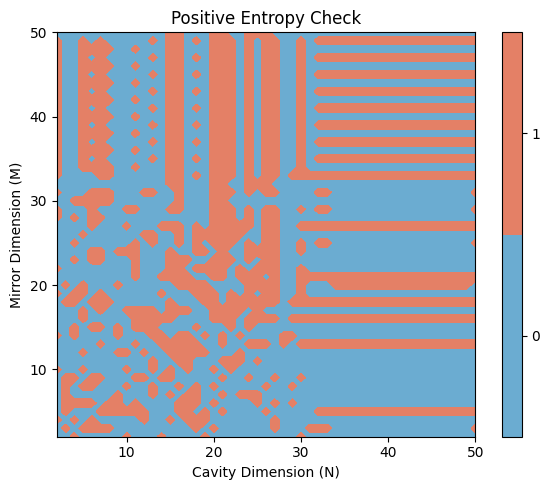

In [5]:
plot_pos_entropy(Ns, Ms, entropy_matrix)

Accepted values of truncation: 0.9945-1.0055
Computing truncation matrix...


Progress: 100%|██████████████████████████████████████████████████████████| 2401/2401 [00:00<00:00, 2746.25it/s]


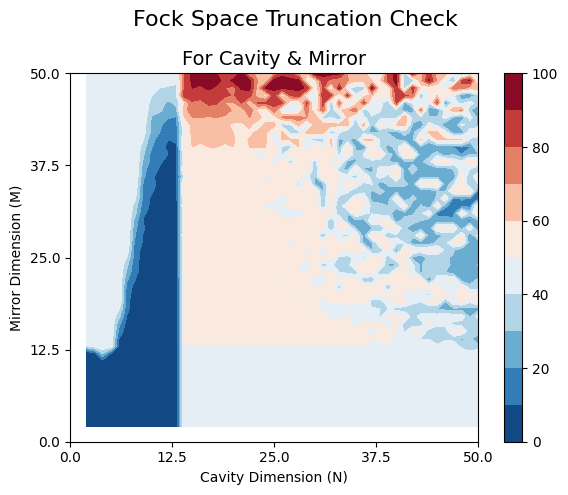

In [14]:
tolerance = .0055
print(f"Accepted values of truncation: {1-tolerance}-{1+tolerance}")

print("Computing truncation matrix...")
truncation_matrix_both = compute_truncation_both(Ns, Ms, results, tolerance)
plot_fock_space_trunc_both(Ns, Ms, N_vals, M_vals, truncation_matrix_both)

In [15]:
# Truncation threshold
min_truc = 90

# Find optimal points
optimal_points,_ = find_optimal_truncation(truncation_matrix_both, entropy_matrix,
                                           N_vals, M_vals, min_truc)

# Print optimal points summary
print_optimal_points_summary(optimal_points, min_truc)


OPTIMAL POINTS SUMMARY (Truncation ≥ 90)
Total optimal points found: 16

Top 5 smallest dimension combinations:
--------------------------------------------------
      N       M    Truncation    N+M       Pos. Ent.
--------------------------------------------------
 1.  17.0    48.0        92.0    65.0       0e+00
 2.  17.0    49.0        94.0    66.0       0e+00
 3.  17.0    50.0        94.0    67.0       0e+00
 4.  18.0    50.0        90.0    68.0       0e+00
 5.  25.0    48.0        92.0    73.0       0e+00

Optimal Points Statistics:
------------------------------
Min N:          17.0
Max N:          42.0
Min M:          48.0
Max M:          50.0
Avg Truncation: 93.1 ± 1.2
